# HW#6 Regularization

안녕하세요, 광운대학교 로봇학부의 오정현 교수입니다. 본 자료는 딥러닝 실습 수업을 위해 제작된 것입니다.

파이썬 문법
- 점프투파이썬(https://wikidocs.net/book/1) 참고

이번 과제는 딥러닝의 일반화 성능을 높이기 위한 Regularization을 해보는 것입니다.이미지 분류에 여러 가지 Regularization 기법을 적용해 보도록 하겠습니다. 대표적인 Regularization 기법으로 Dropout, Data augmentation, Batch Normalization 등이 있습니다.

이번 과제는 (https://www.tensorflow.org/tutorials/keras/classification?hl=ko)를 참고하면 좋습니다.

#1. Data Generation
Data는 mnist dataset을 이용하도록 하겠습니다. mnist dataset은 원래 60000개의 training set이 주어져 있지만 overfitting을 유도하기 위하여 1000개의 data만 이용하려고 합니다. 1000개의 data로 이루어진 x_train과 y_train을 만들어 보세요. 그리고 2000개로 이루어진 large_x_train, large_y_train을 만들어보세요. 그리고 training data의 다른 범위에서 200개로 이루어진 x_validation과 y_validation도 만들어 보세요.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten
from keras import backend as K
from matplotlib import pyplot

batch_size = 28
num_classes = 10
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, Y_train), (x_test,y_test) = mnist.load_data()

### START CODE HERE ###
x_validation = X_train[0:200,:,:]
y_validation = Y_train[0:200]
large_x_train = X_train[200:2200,:,:]
large_y_train = Y_train[200:2200]
x_train = X_train[2200:3200,:,:]
y_train = Y_train[2200:3200]
### END CODE HERE ###
print("x_validation shape:", x_validation.shape)
print("y_validation shape:", y_validation.shape)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    large_x_train = large_x_train.reshape(large_x_train.shape[0], 1, img_rows, img_cols)
    x_validation = x_validation.reshape(x_validation.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    large_x_train = large_x_train.reshape(large_x_train.shape[0], img_rows, img_cols, 1)
    x_validation = x_validation.reshape(x_validation.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
large_x_train = large_x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
large_x_train /= 255
x_validation /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
large_y_train = keras.utils.to_categorical(large_y_train, num_classes)
y_validation = keras.utils.to_categorical(y_validation, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

assert large_x_train.shape[0]==2000
assert large_y_train.shape[0]==2000
assert x_train.shape[0]==1000
assert y_train.shape[0]==1000
assert x_validation.shape[0]==200
assert y_validation.shape[0]==200

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("large_x_train shape:", large_x_train.shape)
print("large_y_train shape:", large_y_train.shape)
print("x_validation shape:", x_validation.shape)
print("y_validation shape:", y_validation.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_validation shape: (200, 28, 28)
y_validation shape: (200,)
x_train shape: (1000, 28, 28, 1)
y_train shape: (1000, 10)
large_x_train shape: (2000, 28, 28, 1)
large_y_train shape: (2000, 10)
x_validation shape: (200, 28, 28, 1)
y_validation shape: (200, 10)


#2. 모델 생성
복습 차원에서 MLP 분류모델을 만들어 보도록 하겠습니다. 모델의 마지막 레이어에는 활성화 함수로 10개의 출력을 가지는 softmax를 달겠습니다. 이를 통해서 모델은 이미지안의 숫자가 0부터 9까지의 숫자중에 어디에 가까운지를 확률적으로 나타냅니다. 



다음과 같은 MLP 모델을 만들어 보세요.

| Layer (type) | Output Shape | Param # |
|------|------|------|
| Flatten | (None, 784) | 0 |
| Dense | (None, 1024) | 803840 |
| Dense | (None, 1024) | 1049600 |
| Dense | (None, 1024) | 1049600 |
| Flatten | (None, 1024) | 0 |
| Dense | (None, 10) | 10250 |

In [2]:
model = Sequential()
### START CODE HERE ###
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Flatten(input_shape=(1024,)))
model.add(Dense(10,activation='softmax'))
### END CODE HERE ###

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
______________________________________________

#3. Learning MLP
기본 MLP 분류모델을 학습해 보겠습니다. Overfitting은 Training data에 맞추어 과도하게 학습이 이루어져 Test data에서 높은 성능이 나지 않는 현상, 즉 Generalization 성능이 높지 않게 나타나는 현상을 의미합니다. 따라서 Overfitting이 발생하면 Training accuracy는 높지만 Test accuracy는 높지 않게 나타납니다. 

현재 모델이 overfitting이 발생하는지 체크해 보세요. 일부러 overfitting이 발생하도록 유도하였기 때문에 overfitting 현상이 나타나야 합니다.

In [3]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
weights = model.get_weights()

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
36/36 [==============================] - 3s 17ms/step - loss: 2.3050 - accuracy: 0.0918 - val_loss: 2.3047 - val_accuracy: 0.1100
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 2.2932 - accuracy: 0.1119 - val_loss: 2.2956 - val_accuracy: 0.1200
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 2.2859 - accuracy: 0.1182 - val_loss: 2.2866 - val_accuracy: 0.1750
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 2.2703 - accuracy: 0.1514 - val_loss: 2.2776 - val_accuracy: 0.1900
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 2.2627 - accuracy: 0.1759 - val_loss: 2.2687 - val_accuracy: 0.2000
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 2.2564 - accuracy: 0.1953 - val_loss: 2.2598 - val_accuracy: 0.2200
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 2.2457 - accuracy: 0.2269 - val_loss: 2.2510 - val_accuracy: 0.2500
Epoch 8/100


#4. Regularization
Overfitting이 발생한 모델에 다양한 Regularization 기법을 이용해 보도록 합시다.

4.1 Large Dataset

Training data가 충분하다면 overfitting 현상이 발생할 가능성이 줄어듭니다. 기본 MLP 분류 모델에서 large_x_train과 large_y_train을 이용하면 성능이 올라갈 것입니다. Generalization 성능이 올라갔나요?

In [4]:
#initialize weights
model.set_weights(weights)

large_model_history=model.fit(large_x_train, large_y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation))

score = model.evaluate(x_test, y_test, verbose=0)
print('Largemodel Test loss:', score[0])
print('Largemodel Test accuracy:', score[1])

Epoch 1/100
72/72 [==============================] - 0s 5ms/step - loss: 2.2926 - accuracy: 0.1240 - val_loss: 2.2956 - val_accuracy: 0.1500
Epoch 2/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2740 - accuracy: 0.1660 - val_loss: 2.2777 - val_accuracy: 0.1850
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2556 - accuracy: 0.2130 - val_loss: 2.2599 - val_accuracy: 0.2500
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2375 - accuracy: 0.2665 - val_loss: 2.2423 - val_accuracy: 0.2950
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2195 - accuracy: 0.3355 - val_loss: 2.2249 - val_accuracy: 0.3600
Epoch 6/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2015 - accuracy: 0.3820 - val_loss: 2.2074 - val_accuracy: 0.3850
Epoch 7/100
72/72 [==============================] - 0s 4ms/step - loss: 2.1835 - accuracy: 0.4420 - val_loss: 2.1899 - val_accuracy: 0.4300
Epoch 8/100
7

##4.2 Dropout
Dropout은 쉽게 쓸 수 있는 Regularization 기법입니다. Layer 사이에 Dropout layer만 추가하면 되기 때문에 간편합니다. 다음과 같은 Dropout model을 만들어 보세요.

| Layer (type) | Output Shape | Param # |
|------|------|------|
| Flatten | (None, 784) | 0 |
| Dense | (None, 1024) | 803840 |
| Dense | (None, 1024) | 1049600 |
| Dense | (None, 1024) | 1049600 |
| Dropout | (None, 1024) | 0 |
| Flatten | (None, 1024) | 0 |
| Dense | (None, 10) | 10250 |

In [5]:
dropout_model = Sequential()
### START CODE HERE ###
dropout_model.add(Flatten(input_shape=(28,28)))
dropout_model.add(Dense(1024,activation='relu'))
dropout_model.add(Dense(1024,activation='relu'))
dropout_model.add(Dense(1024,activation='relu'))
dropout_model.add(Dropout(0.3))
dropout_model.add(Flatten(input_shape=(1024,)))
dropout_model.add(Dense(10,activation='softmax'))
### END CODE HERE ###

dropout_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

Dropout Model을 학습해 보겠습니다. Generalization 성능이 올라갔나요?

※Dropout을 적용한 Model은 일정확률로 신경망의 뉴런을 비활성화시키기 때문에, 오버피팅을 방지하는 효과가 있습니다. 하지만 비활성화로 인해서  학습속도가 떨어진다는 단점이 존재합니다. 그 때문에 test accuracy는 같은 학습파라미터 조건에서 기존모델보다 더 낮을 수 있습니다. 

기존모델과 dropout을 적용한 모델에 대해서, train 데이터와 test데이터에 대한 accuracy차이를 주목해보시면 좋을 것같습니다!

In [6]:
dropout_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

dropout_model_history=dropout_model.fit(large_x_train, large_y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation))

score = dropout_model.evaluate(x_test, y_test, verbose=0)
print('Dropout model Test loss:', score[0])
print('Dropout model Test accuracy:', score[1])

Epoch 1/100
72/72 [==============================] - 1s 6ms/step - loss: 2.3230 - accuracy: 0.1107 - val_loss: 2.3167 - val_accuracy: 0.1200
Epoch 2/100
72/72 [==============================] - 0s 4ms/step - loss: 2.3042 - accuracy: 0.1157 - val_loss: 2.2957 - val_accuracy: 0.1200
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2787 - accuracy: 0.1254 - val_loss: 2.2756 - val_accuracy: 0.1200
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2701 - accuracy: 0.1281 - val_loss: 2.2559 - val_accuracy: 0.1250
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2487 - accuracy: 0.1261 - val_loss: 2.2365 - val_accuracy: 0.1650
Epoch 6/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2258 - accuracy: 0.1771 - val_loss: 2.2176 - val_accuracy: 0.2100
Epoch 7/100
72/72 [==============================] - 0s 4ms/step - loss: 2.2123 - accuracy: 0.2036 - val_loss: 2.1990 - val_accuracy: 0.2750
Epoch 8/100
7

##4.3 BatchNormalization
BatchNormalization(BN)은 쉽게 쓸 수 있는 Regularization 기법입니다. Layer 사이에 BN layer만 추가하면 되기 때문에 간편합니다. 다음과 같은 BN model을 만들어 보세요.

| Layer (type) | Output Shape | Param # |
|------|------|------|
| Flatten | (None, 784) | 0 |
| Dense | (None, 1024) | 803840 |
| BatchNormalization | (None, 1024) | 4096 |
| Activation | (None, 1024) | 0 |
| Dense | (None, 1024) | 1049600 |
| BatchNormalization | (None, 1024) | 4096 |
| Activation | (None, 1024) | 0 |
| Dense | (None, 1024) | 1049600 |
| BatchNormalization | (None, 1024) | 4096 |
| Activation | (None, 1024) | 0 |
| Flatten | (None, 1024) | 0 |
| Dense | (None, 10) | 10250 |

In [7]:
bn_model = Sequential()
### START CODE HERE ###
bn_model.add(Flatten(input_shape=(28,28)))
bn_model.add(Dense(1024))
bn_model.add(BatchNormalization())
bn_model.add(Activation('relu'))
bn_model.add(Dense(1024))
bn_model.add(BatchNormalization())
bn_model.add(Activation('relu'))
bn_model.add(Dense(1024))
bn_model.add(BatchNormalization())
bn_model.add(Activation('relu'))
bn_model.add(Flatten(input_shape=(1024,)))
bn_model.add(Dense(10,activation='softmax'))
### END CODE HERE ###
bn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)             

BN Model을 학습해 보겠습니다. Generalization 성능이 올라갔나요?

In [8]:
bn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
bn_model_history=bn_model.fit(large_x_train, large_y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation))

score = bn_model.evaluate(x_test, y_test, verbose=0)
print('BN model Test loss:', score[0])
print('BN model Test accuracy:', score[1])

Epoch 1/100
72/72 [==============================] - 1s 8ms/step - loss: 2.6078 - accuracy: 0.1379 - val_loss: 2.2660 - val_accuracy: 0.1000
Epoch 2/100
72/72 [==============================] - 0s 6ms/step - loss: 2.3879 - accuracy: 0.1923 - val_loss: 2.2087 - val_accuracy: 0.1350
Epoch 3/100
72/72 [==============================] - 0s 5ms/step - loss: 2.1855 - accuracy: 0.2469 - val_loss: 2.0769 - val_accuracy: 0.2300
Epoch 4/100
72/72 [==============================] - 0s 5ms/step - loss: 2.0530 - accuracy: 0.2913 - val_loss: 1.9075 - val_accuracy: 0.3600
Epoch 5/100
72/72 [==============================] - 0s 5ms/step - loss: 1.9147 - accuracy: 0.3343 - val_loss: 1.7469 - val_accuracy: 0.4200
Epoch 6/100
72/72 [==============================] - 0s 5ms/step - loss: 1.8062 - accuracy: 0.3917 - val_loss: 1.6100 - val_accuracy: 0.4950
Epoch 7/100
72/72 [==============================] - 0s 6ms/step - loss: 1.6573 - accuracy: 0.4627 - val_loss: 1.4974 - val_accuracy: 0.5400
Epoch 8/100
7

##4.4 Final Model
지금까지 썼던 Regularization 기법들을 종합선물세트로 적용해 봅시다. 다음과 같은 Final model을 만들어 보세요.

| Layer (type) | Output Shape | Param # |
|------|------|------|
| Flatten | (None, 784) | 0 |
| Dense | (None, 1024) | 803840 |
| BatchNormalization | (None, 1024) | 4096 |
| Activation | (None, 1024) | 0 |
| Dense | (None, 1024) | 1049600 |
| BatchNormalization | (None, 1024) | 4096 |
| Activation | (None, 1024) | 0 |
| Dense | (None, 1024) | 1049600 |
| BatchNormalization | (None, 1024) | 4096 |
| Activation | (None, 1024) | 0 |
| Dropout | (None, 1024) | 0 |
| Flatten | (None, 1024) | 0 |
| Dense | (None, 10) | 10250 |

In [9]:
final_model = Sequential()
### START CODE HERE ###
final_model.add(Flatten(input_shape=(28,28)))
final_model.add(Dense(1024))
final_model.add(BatchNormalization())
final_model.add(Activation('relu'))
final_model.add(Dense(1024))
final_model.add(BatchNormalization())
final_model.add(Activation('relu'))
final_model.add(Dense(1024))
final_model.add(BatchNormalization())
final_model.add(Activation('relu'))
final_model.add(Dropout(0.3))
final_model.add(Flatten(input_shape=(1024,)))
final_model.add(Dense(10,activation='softmax'))
### END CODE HERE ###
final_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_3 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_4 (Activation)    (None, 1024)             

Final Model을 학습해 보겠습니다. Generalization 성능이 올라갔나요?

In [10]:
final_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
final_model_history=final_model.fit(large_x_train, large_y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation))

score = final_model.evaluate(x_test, y_test, verbose=0)
print('Final model Test loss:', score[0])
print('Final model Test accuracy:', score[1])

Epoch 1/100
72/72 [==============================] - 1s 8ms/step - loss: 2.8081 - accuracy: 0.1085 - val_loss: 2.3281 - val_accuracy: 0.0850
Epoch 2/100
72/72 [==============================] - 0s 6ms/step - loss: 2.6398 - accuracy: 0.1402 - val_loss: 2.3302 - val_accuracy: 0.1100
Epoch 3/100
72/72 [==============================] - 0s 5ms/step - loss: 2.4987 - accuracy: 0.1698 - val_loss: 2.2733 - val_accuracy: 0.1750
Epoch 4/100
72/72 [==============================] - 0s 5ms/step - loss: 2.3436 - accuracy: 0.2279 - val_loss: 2.1734 - val_accuracy: 0.1900
Epoch 5/100
72/72 [==============================] - 0s 5ms/step - loss: 2.1989 - accuracy: 0.2541 - val_loss: 2.0543 - val_accuracy: 0.2450
Epoch 6/100
72/72 [==============================] - 0s 5ms/step - loss: 2.1099 - accuracy: 0.2931 - val_loss: 1.9379 - val_accuracy: 0.2950
Epoch 7/100
72/72 [==============================] - 0s 5ms/step - loss: 1.9821 - accuracy: 0.3365 - val_loss: 1.8284 - val_accuracy: 0.3250
Epoch 8/100
7

(optional) Training data가 늘어나면 regularization 효과가 나는 것을 보였습니다. 쉽게 training data를 늘릴 수 있는 방법은 data augmentation 입니다. 이 방법은 기존 training data를 적절히 rotating, flipping, scaling, shifting 하여 training data 수를 늘리는 것입니다. data augmentation의 regularization 효과를 테스트해 보세요. 또한 뉴럴 네트워크의 노드 개수나 층수를 바꿔서 성능을 올려보는 것도 테스트해보세요.

필요한 Libary Import 하기

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten
from keras import backend as K
from matplotlib import pyplot

데이터 생성 ImageDataGenerator를 이용하여 Data Augmentation 구현  

Rotations - 90  
horizontal_flip - 수평방향으로 뒤집기  
vertical_flip - 수직방향으로 뒤집기  
width_shift_range - 가로 방향으로 이동  
height_shift_range - 세로 방향으로 이동





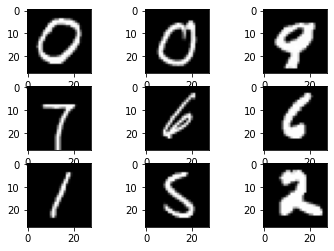

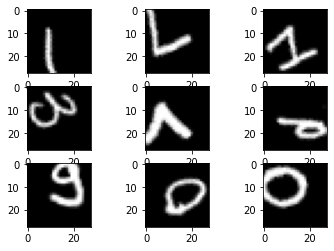

large_x_train_agg shape: (2000, 28, 28, 1)
large_y_train_agg shape: (2000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [12]:
batch_size = 28
num_classes = 10
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, Y_train), (x_test,y_test) = mnist.load_data()

# 아까와 마찬가지 방법으로 split
large_x_train_agg = X_train[200:2200,:,:]
large_y_train_agg = Y_train[200:2200]

large_y_train_agg = Y_train[200:2200]

if K.image_data_format() == 'channels_first':
    large_x_train_agg = large_x_train_agg.reshape(large_x_train_agg.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    large_x_train_agg = large_x_train_agg.reshape(large_x_train_agg.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# convert from int to float
large_x_train_agg = large_x_train_agg.astype('float32')
x_test = x_test.astype('float32')

# plot을 위한 ImageDataGenerator 생성
datagen1 = ImageDataGenerator()
datagen1.fit(large_x_train_agg)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen1.flow(large_x_train_agg, large_y_train_agg, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

# define data preparation
shift = 0.2

# define data preparation
datagen = ImageDataGenerator(rotation_range=90,
                             horizontal_flip=True, vertical_flip=True,
                             width_shift_range=shift, height_shift_range=shift)

# fit parameters from data
datagen.fit(large_x_train_agg)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(large_x_train_agg, large_y_train_agg, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

large_x_train_agg /= 255
x_test /= 255

# convert class vectors to binary class matrices
large_y_train_agg = keras.utils.to_categorical(large_y_train_agg, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("large_x_train_agg shape:", large_x_train_agg.shape)
print("large_y_train_agg shape:", large_y_train_agg.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

동일한 모델을 이용하여 Training

In [13]:
final_model_history=final_model.fit(large_x_train_agg, large_y_train_agg,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation))

score = final_model.evaluate(x_test, y_test, verbose=0)
print('Final model Test loss:', score[0])
print('Final model Test accuracy:', score[1])

Epoch 1/100
72/72 [==============================] - 0s 6ms/step - loss: 0.2932 - accuracy: 0.9265 - val_loss: 0.3708 - val_accuracy: 0.9200
Epoch 2/100
72/72 [==============================] - 0s 5ms/step - loss: 0.2981 - accuracy: 0.9305 - val_loss: 0.3693 - val_accuracy: 0.9200
Epoch 3/100
72/72 [==============================] - 0s 6ms/step - loss: 0.2835 - accuracy: 0.9285 - val_loss: 0.3685 - val_accuracy: 0.9200
Epoch 4/100
72/72 [==============================] - 0s 6ms/step - loss: 0.2765 - accuracy: 0.9310 - val_loss: 0.3669 - val_accuracy: 0.9200
Epoch 5/100
72/72 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.9370 - val_loss: 0.3652 - val_accuracy: 0.9200
Epoch 6/100
72/72 [==============================] - 0s 6ms/step - loss: 0.2788 - accuracy: 0.9305 - val_loss: 0.3634 - val_accuracy: 0.9200
Epoch 7/100
72/72 [==============================] - 0s 6ms/step - loss: 0.2898 - accuracy: 0.9240 - val_loss: 0.3617 - val_accuracy: 0.9200
Epoch 8/100
7

새로운 모델 만들어보기

In [14]:
new_model = Sequential()
### START CODE HERE ###
new_model.add(Flatten(input_shape=(28,28)))
new_model.add(Dense(784))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Dropout(0.3))
new_model.add(Dense(1024))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Dense(784))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Dense(1024))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Dropout(0.3))
new_model.add(Flatten(input_shape=(1024,)))
new_model.add(Dense(10,activation='softmax'))
### END CODE HERE ###
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 784)               615440    
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
activation_6 (Activation)    (None, 784)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_7 (Batch (None, 1024)             

In [16]:
new_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

new_model_history=new_model.fit(large_x_train_agg, large_y_train_agg,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation))

score = new_model.evaluate(x_test, y_test, verbose=0)
print('New model Test loss:', score[0])
print('New model Test accuracy:', score[1])

Epoch 1/100
72/72 [==============================] - 2s 10ms/step - loss: 2.8114 - accuracy: 0.0986 - val_loss: 2.2928 - val_accuracy: 0.1850
Epoch 2/100
72/72 [==============================] - 0s 6ms/step - loss: 2.7580 - accuracy: 0.1116 - val_loss: 2.2648 - val_accuracy: 0.1900
Epoch 3/100
72/72 [==============================] - 0s 6ms/step - loss: 2.6254 - accuracy: 0.1322 - val_loss: 2.2123 - val_accuracy: 0.2300
Epoch 4/100
72/72 [==============================] - 0s 6ms/step - loss: 2.5180 - accuracy: 0.1436 - val_loss: 2.1427 - val_accuracy: 0.2650
Epoch 5/100
72/72 [==============================] - 0s 6ms/step - loss: 2.5305 - accuracy: 0.1589 - val_loss: 2.0678 - val_accuracy: 0.3000
Epoch 6/100
72/72 [==============================] - 0s 6ms/step - loss: 2.4423 - accuracy: 0.1712 - val_loss: 2.0014 - val_accuracy: 0.3250
Epoch 7/100
72/72 [==============================] - 0s 6ms/step - loss: 2.3483 - accuracy: 0.1694 - val_loss: 1.9350 - val_accuracy: 0.3600
Epoch 8/100
